# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [66]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhaam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [67]:
# Read your api key environment variable
api_key = os.getenv("newsapi")

In [68]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [69]:
#create article df function
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [102]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q=" bitcoin AND BTC AND 2022",
    language="en"
)
btc_news['totalResults']

1268

In [108]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q=" ethereum AND ETH AND 2022",
    language="en"
)
eth_news['totalResults']

771

In [109]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

In [110]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

In [111]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.043520,0.057500,0.042000,0.900550
std,0.341464,0.051405,0.063622,0.097133
min,-0.542300,0.000000,0.000000,0.614000
25%,-0.081300,0.000000,0.000000,0.851000
50%,0.051350,0.069500,0.000000,0.918000
75%,0.264275,0.085000,0.062750,0.966250
max,0.709600,0.169000,0.217000,1.000000


In [112]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.167930,0.073700,0.03395,0.892350
std,0.394712,0.073036,0.03575,0.069703
min,-0.542300,0.000000,0.00000,0.737000
25%,-0.115300,0.000000,0.00000,0.857750
50%,0.249150,0.064500,0.03800,0.890500
75%,0.505750,0.135000,0.05600,0.945500
max,0.865500,0.263000,0.11300,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum (0.073700) 

Q: Which coin had the highest compound score?

A: Ethereum (0.865500)

Q. Which coin had the highest positive score?

A: Ethereum (0.2630000)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [114]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [115]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [116]:
# Complete the tokenizer function
def clean_text(article):
    
    # Create a list of the words
    sw = set(stopwords.words('english'))

    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")

    # Remove the punctuation
    re_clean = regex.sub('', article)

    # Remove the stop words
    words = word_tokenize(re_clean)

    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # .union combines all items from two sets (AND EXCLUDES DUPLICATES)
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    # Return the final list
    return output

In [117]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(word_tokenize)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,<ul><li>Elon Musk will be able to focus on Tes...,2022-04-19,0.4404,0.079,0.000,0.921,"[<, ul, >, <, li, >, Elon, Musk, will, be, abl..."
1,Apparently not satisfied to report that it had...,2022-04-13,-0.3252,0.000,0.061,0.939,"[Apparently, not, satisfied, to, report, that,..."
2,"Financial markets are in a rough patch, as the...",2022-05-07,-0.4215,0.082,0.158,0.761,"[Financial, markets, are, in, a, rough, patch,..."
3,Bitcoin's ( BTC 0.37% ) monumental run through...,2022-04-09,0.3071,0.085,0.000,0.915,"[Bitcoin, 's, (, BTC, 0.37, %, ), monumental, ..."
4,What happened\r\nShares of Riot Blockchain(RIO...,2022-05-06,-0.4939,0.169,0.217,0.614,"[What, happened, Shares, of, Riot, Blockchain,..."


In [118]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(word_tokenize)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[A, multi-billion, dollar, cryptocurrency, com..."
1,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[When, Bored, Ape, Yacht, Club, creators, Yuga..."
2,If you ever wanted to buy an NFT based on Ethe...,2022-05-02,-0.1027,0.000,0.036,0.964,"[If, you, ever, wanted, to, buy, an, NFT, base..."
3,Digital transformation is disrupting global bu...,2022-04-18,0.4939,0.135,0.000,0.865,"[Digital, transformation, is, disrupting, glob..."
4,Mike Masnick wrote a good piece on this topic ...,2022-04-10,0.5413,0.143,0.055,0.802,"[Mike, Masnick, wrote, a, good, piece, on, thi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [124]:
from collections import Counter
from nltk import ngrams

In [126]:
# Generate the Bitcoin N-grams where N=2
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus.text)
    processed = clean_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

word_counter(btc_df)

,bigram,count
0,"(interest, rate)",4
1,"(bitcoin, btc)",3
2,"(market, char)",2
3,"(rate, geopolitical)",2
4,"(cryptocurrency, market)",2
5,"(federal, reserves)",2
6,"(rate, decision)",2
7,"(char, good)",2
8,"(good, morning)",2
9,"(omaha, nebraska)",2


In [128]:
# Generate the Ethereum N-grams where N=2
word_counter(eth_df)

,bigram,count
0,"(ethereum, eth)",3
1,"(bored, ape)",2
2,"(ape, yacht)",2
3,"(yacht, club)",2
4,"(yuga, labs)",2
5,"(ha, char)",2
6,"(eth, ha)",2
7,"(nonfungible, token)",2
8,"(multibillion, dollar)",1
9,"(dollar, cryptocurrency)",1


In [136]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [137]:
# Use token_count to get the top 10 words for Bitcoin
btc_text = ' '.join(btc_df.text)
btc_processed = clean_text(btc_text)
token_count(btc_processed)

[('char', 20),
 ('bitcoin', 9),
 ('market', 6),
 ('april', 6),
 ('btc', 5),
 ('rate', 5),
 ('interest', 4),
 ('could', 3),
 ('cryptocurrency', 3),
 ('crypto', 3)]

In [139]:
# Use token_count to get the top 10 words for Ethereum
eth_text = ' '.join(eth_df.text)
eth_processed = clean_text(eth_text)

token_count(eth_processed)

[('char', 20),
 ('ha', 9),
 ('cryptocurrency', 8),
 ('ethereum', 6),
 ('wa', 5),
 ('last', 4),
 ('digital', 4),
 ('eth', 4),
 ('labs', 3),
 ('bored', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

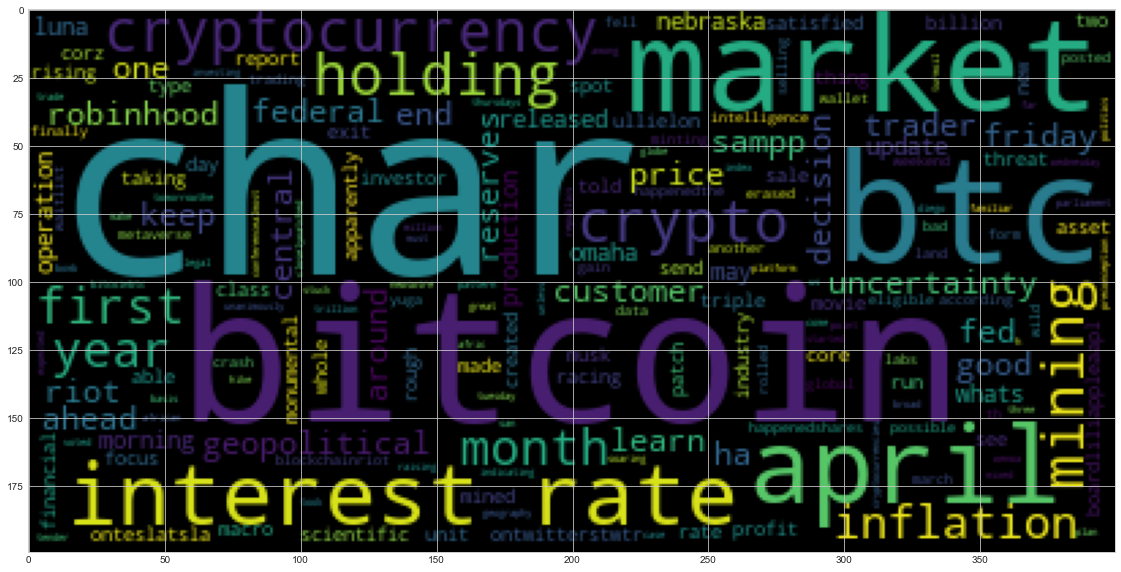

In [145]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(btc_processed)

btc_cloud = WordCloud().generate(btc_words)
plt.imshow(btc_cloud)

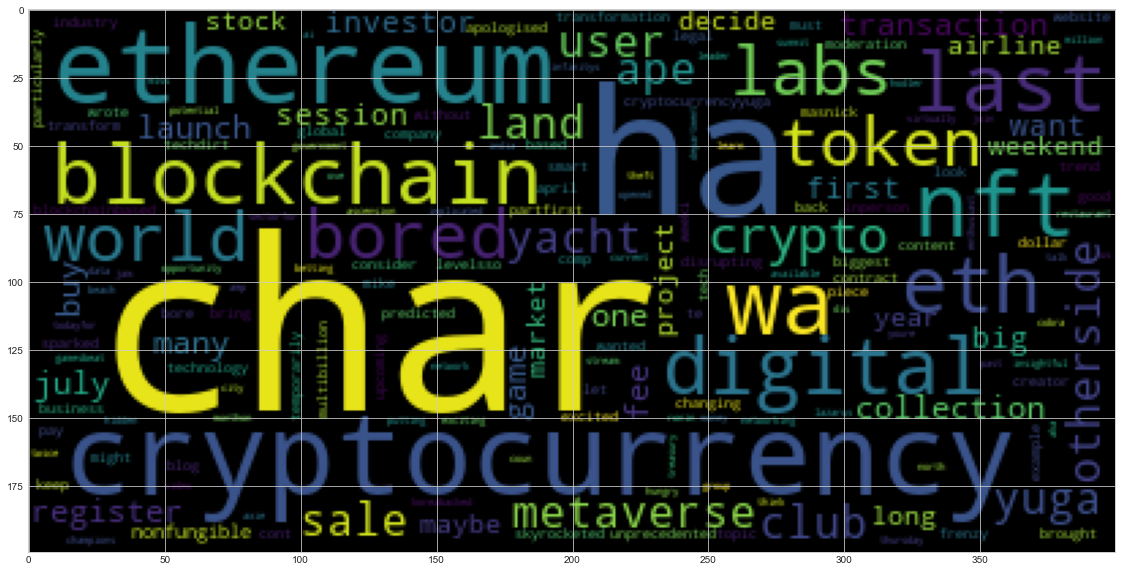

In [146]:
# Generate the Ethereum word cloud
eth_words = ' '.join(eth_processed)

eth_cloud = WordCloud().generate(eth_words)
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [154]:
import spacy
from spacy import displacy

In [155]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [151]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df.text)

In [157]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [158]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [169]:
# List all Entities
entity = []
label = []

for ent in btc_ner.ents:
    entity.append(ent.text)
    label.append(ent.label_)
    
data = {"Entity": entity, "Label":label}

btc_entities = pd.DataFrame(data)
btc_entities

,Entity,Label
0,TSLA,ORG
1,TWTR,ORG
2,AAPL,ORG
3,$20 billion,MONEY
4,this year,DATE
...,...,...
89,LFG,ORG
90,an additional $1.5bn,MONEY
91,April 2022,DATE
92,405,CARDINAL


---

### Ethereum NER

In [170]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df.text)

In [171]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [172]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [173]:
# List all Entities
entity = []
label = []

for ent in eth_ner.ents:
    entity.append(ent.text)
    label.append(ent.label_)
    
data = {"Entity": entity, "Label":label}

eth_entities = pd.DataFrame(data)
eth_entities

,Entity,Label
0,Ethereum,ORG
1,Yuga Labs,PERSON
2,Bored Ape Yacht Club,PERSON
3,Yuga Labs,PERSON
4,Otherside,ORG
...,...,...
66,2014,DATE
67,Vitalik Buterin,PERSON
68,Ethereum,ORG
69,0.95%,PERCENT


---